In [1]:
import sympy as sp
sp.init_printing()

In [2]:
def test_issue_12629():
    try:
        k, n = sp.symbols('k n', integer=True)
        sp.latex(sp.SeqFormula(0, (k, 1, n)))
    except TypeError:
        print("Sadly, sequences with variable limits cannot be printed in Sympy 1.0.\n"
            + "See: https://github.com/sympy/sympy/issues/12629")
        raise

test_issue_12629()

In [3]:
from cohomology import ast_matrix
from my_resolution import *

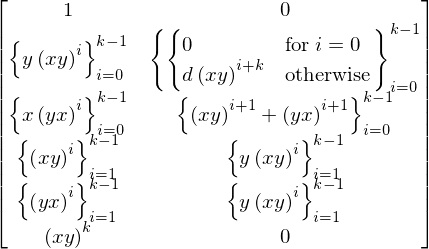

In [4]:
ast_matrix(Y)

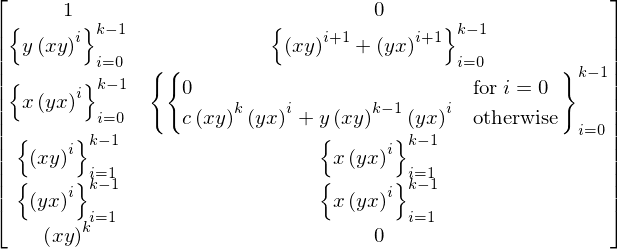

In [5]:
ast_matrix(X)

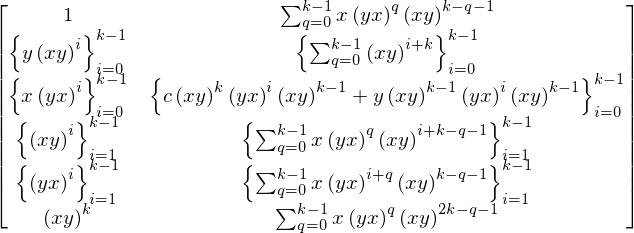

In [6]:
ast_matrix(lbda)

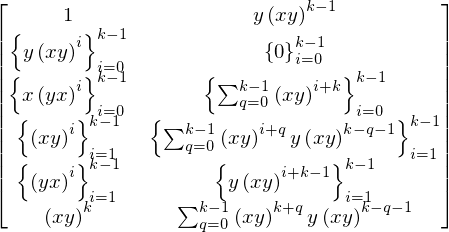

In [7]:
ast_matrix(mu)

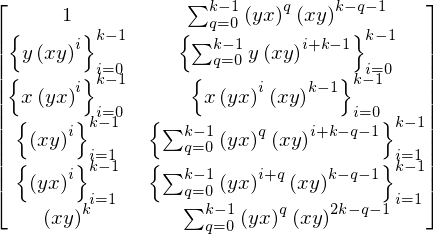

In [8]:
ast_matrix(phi1)

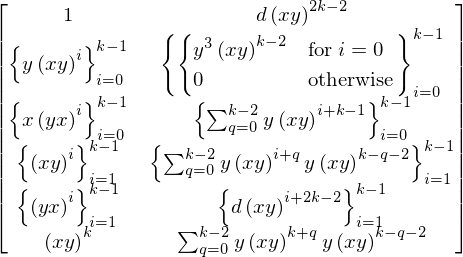

In [9]:
ast_matrix(phi2 - X)

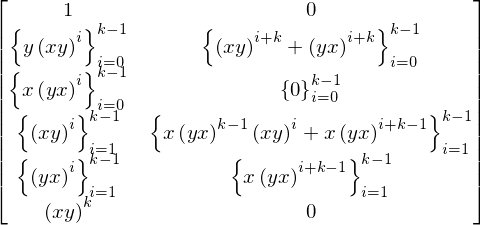

In [10]:
ast_matrix(rho)

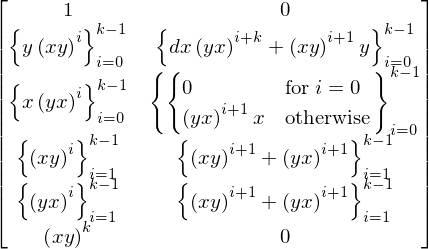

In [11]:
ast_matrix(tau)

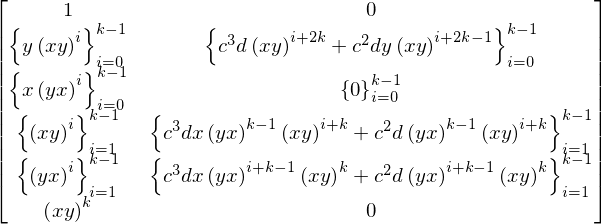

In [12]:
ast_matrix(A)

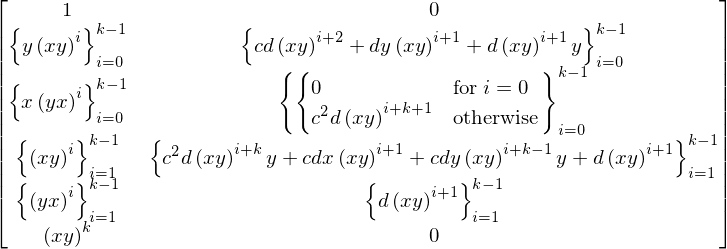

In [13]:
ast_matrix(B)

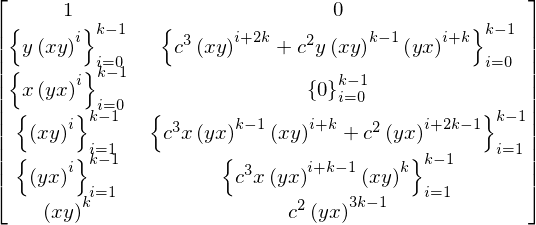

In [14]:
ast_matrix(C)

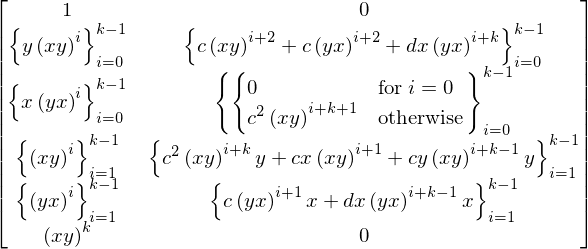

In [15]:
ast_matrix(D)

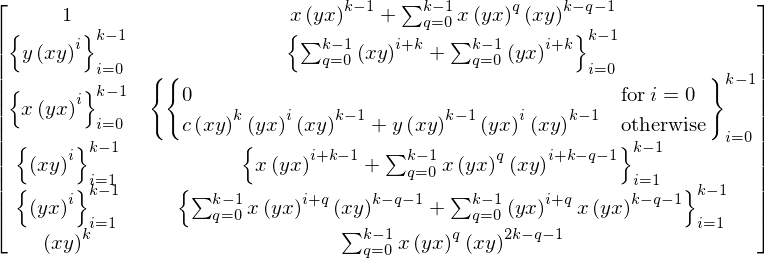

In [16]:
ast_matrix(sigma)

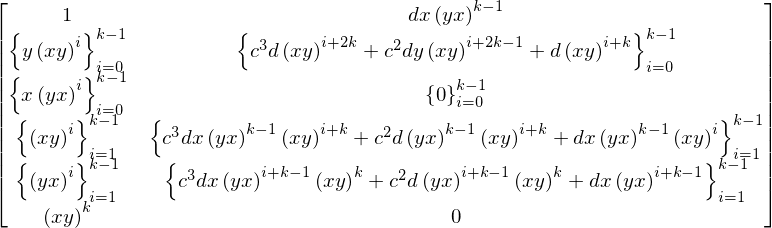

In [17]:
ast_matrix(E)

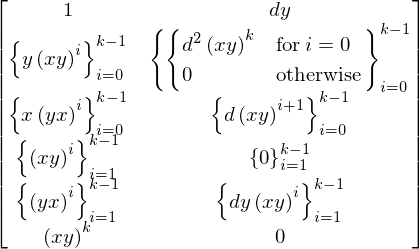

In [18]:
ast_matrix(F)

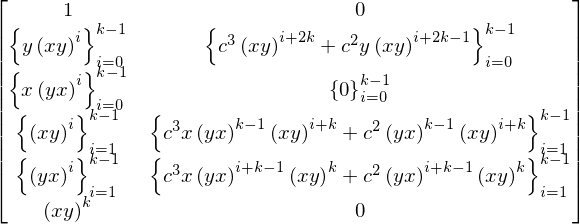

In [19]:
ast_matrix(G)

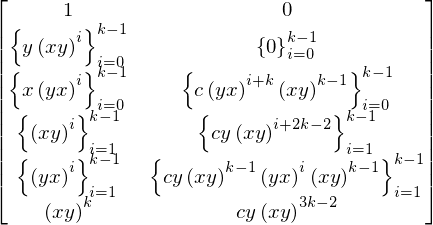

In [20]:
ast_matrix(H)

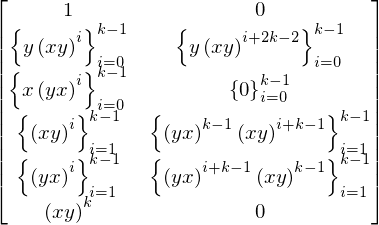

In [21]:
ast_matrix(psi)

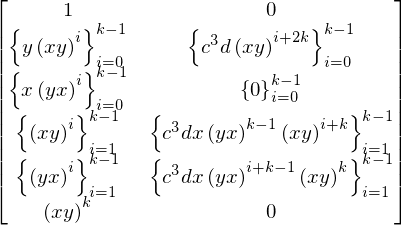

In [22]:
ast_matrix(I)

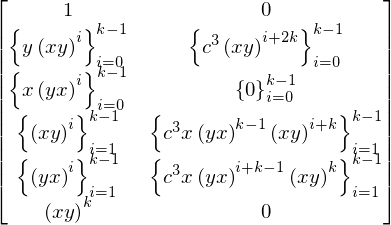

In [23]:
ast_matrix(J)

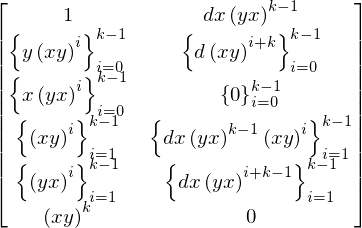

In [24]:
ast_matrix(K)

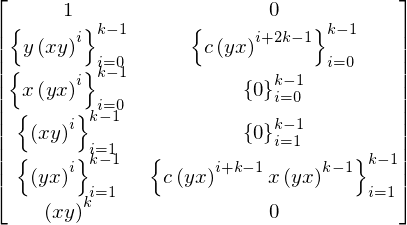

In [25]:
ast_matrix(L)

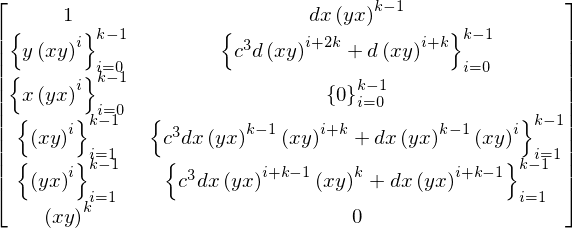

In [26]:
ast_matrix(M)